## Sod's Shock-Tube Problem

In this notebook, we will explore the Riemann solver of Roe to solve Sod's Shock-Tube Problem and the use of limiters when a MUSCL-reconstructed stencil is used.

To run each of the following cells, use the keyboard shortcut **SHIFT** + **ENTER**, press the button ``Run`` in the toolbar or find the option ``Cell > Run Cells`` from the menu bar. For more shortcuts, see ``Help > Keyboard Shortcuts``.

To get started, import the required Python modules by running the cell below.

In [1]:
# Configuration for visualizing the plots
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

# Required modules
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt

# Import figure style and custom functions
import nbtools as nb

Complete the definition of the flux vector for the Euler equations using the conserved variables ``u``.

In [76]:
def euler_flux(u):
    f = 0.0*u
    p = (gamma - 1)*(u[2] - 0.5*u[1]**2/u[0])
    f[0] = u[1]
    f[1] = 
    f[2] = 
    return f

**The Riemann Solver of Roe**

First, we will complete the definition of the Roe Riemann solver following the theory in the textbook

In [77]:
def roe_scheme(ul, ur):
    # Get density
    rhol = ul[0]
    rhor = ur[0]

    # Compute velocity
    vl = ul[1]/ul[0]
    vr = ur[1]/ur[0]
    
    # Compute pressure
    pl = (gamma - 1)*rhol*(ul[2]/ul[0] - 0.5*vl**2)
    pr = (gamma - 1)*rhor*(ur[2]/ur[0] - 0.5*vr**2)

    # Compute enthalpy
    hl = 
    hr = 
    
    # Compute Roe averages
    vm = 
    hm = 
    cm = 
    
    # Compute averaged eigenvalues
    l1 = vm - cm 
    l2 = vm
    l3 = vm + cm
    
    # Compute right averaged eigenvectors
    k = np.array([[        1,          1,          1],
                  [   vm - cm,        vm,    vm + cm],
                  [hm - vm*cm, 0.5*vm**2, hm + vm*cm]])
    
    # Compute wave strengths (alpha)
    du = ur - ul
    a2 = (gamma - 1)/cm**2 *(du[0]*(hm - vm**2) + vm*du[1] - du[2])
    a1 = 
    a3 = 
 
    # Check for rarefaction waves (Harten's entropy fix)
    tol = 0.001
    
    # Left wave
    if abs(l1) < tol:
        l1 = (l1**2 + tol**2)/(2*tol)
    
    # Right wave
    if abs(l3) < tol:
        l2 = (l2**2 + tol**2)/(2*tol)
        
    # Compute left and right Euler fluxes
    fl = euler_flux(ul)
    fr = euler_flux(ur)
    
    # Compute Riemann flux
    fm = 0.5*(fl + fr - (a1*abs(l1)*k[:, 0] + a2*abs(l2)*k[:, 1] + a3*abs(l3)*k[:, 2]))
    return fm

To advance the solution in time, we will use the midpoint method, which is given below

In [78]:
def advance_solution(ut, dt, tf):
    t = 0
    while t < tf:
        r = residual(ut)
        um = ut + 0.5*dt*r
        rm = residual(um)
        uf = ut + 1.0*dt*rm
        ut = uf
        t += dt 
    return ut.T

Now, we define the ``residual`` function following the scheme of Godunov

In [79]:
def residual(u):
    r = 0.0*u
    for i in range(1, n - 1):
        fl = roe_scheme(u[i - 1], u[i])
        fr = roe_scheme(u[i], u[i + 1])
        r[i] = -(fr - fl)/dx
    return r

Define the global constant ``gamma=1.4``

In [80]:
gamma = 1.4

To initialize the solution, it will become useful to define a function ``initialize_sod``. Complete the missing lines

In [81]:
def initialize_sod(x, rhol, vl, pl, rhor, vr, pr):
    rho = 0.0*x
    v = 0.0*x
    p = 0.0*x

    # Initialize discontinuous solution on grid
    for j, xval in enumerate(x):
        if xval <= L/2:
            rho[j] = 
            v[j] = 
            p[j] = 
        else:
            rho[j] = 
            v[j] = 
            p[j] = 
    
    # Compute specific energy
    e = p/(gamma*rho-rho)
    E = 

    # Initialize vector of conserved variables
    u0 = np.array([rho, rho*v, rho*E])
    return u0.T

Consider a grid with
- ``n=100``
- ``L=1.0``

In [82]:
n = 
L = 

dx = L/n
x = np.linspace(0, L, n)

Define the left and right states

\begin{align}
	\vec u_L = 
	\begin{bmatrix}
		\rho_L \\ v_L \\ p_L 
	\end{bmatrix}
	= 
	\begin{bmatrix}
		1 \\ 0 \\ 1
	\end{bmatrix},
	\quad \text{and} \quad 
	\vec u_R = 
	\begin{bmatrix}
		\rho_R \\ v_R \\ p_R
	\end{bmatrix}
	= 
	\begin{bmatrix}
		\frac{1}{8} \\ 0 \\ \frac{1}{10}
	\end{bmatrix}.
\end{align}


In [83]:
# Left state
rhol = 
vl = 
pl = 

# Right state
rhor =
vr = 
pr = 

u0 = initialize_sod(x, rhol, vl, pl, rhor, vr, pr)

Using a time-step size $\Delta t=0.002$, advance the solution until $t=0.2$.

In [84]:
dt = 
tf = 

In [85]:
u_sod = advance_solution(u0, dt, tf)

Plot the result from the implemented scheme and compare with the exact solution. Run the following cell to define the plotting function and generate the first plot.

<IPython.core.display.Javascript object>


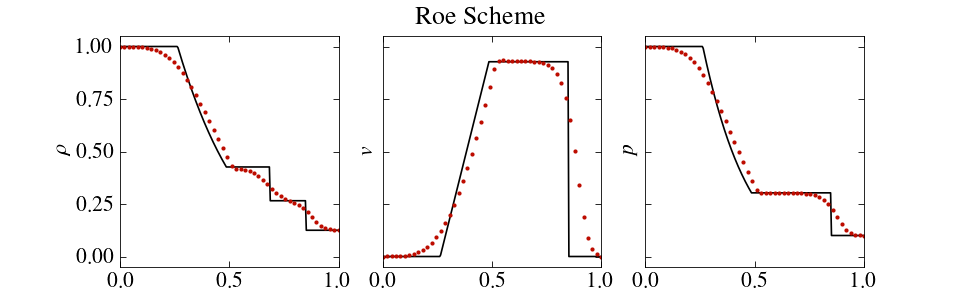

In [89]:
def plot_sod(u, title):
    fig, ax = plt.subplots(figsize=(8, 2.5), ncols=3, sharex=True, sharey=True)

    # Read file in notebooks/data directory
    ue = np.loadtxt('data/sod-shock-tube.txt')

    # Extract rho, v and p from file
    x_e = ue[:, 0]
    rho_e = ue[:, 1]
    v_e = ue[:, 2]
    p_e = ue[:, 3]

    # Plot exact solution
    ax[0].plot(x_e, rho_e, 'k', lw=1)
    ax[1].plot(x_e, v_e, 'k', lw=1)
    ax[2].plot(x_e, p_e, 'k', lw=1)

    # Compute density, velocity and specific energy
    rho = u_sod[0]
    v = u_sod[1]/rho
    E = u_sod[2]/rho

    # Compute pressure using rho, v, E
    p = (gamma - 1)*rho*(E - 0.5*v**2)

    # Plot numerical results
    ax[0].plot(x, rho, 'o', markersize=1.5, color='#bd0c00')
    ax[1].plot(x, v, 'o', markersize=1.5, color='#bd0c00')
    ax[2].plot(x, p, 'o', markersize=1.5, color='#bd0c00')

    ax[0].set_ylabel(r'$\rho$')
    ax[1].set_ylabel(r'$v$')
    ax[2].set_ylabel(r'$p$')

    ax[0].set_xlabel(r'$x$')
    ax[1].set_xlabel(r'$x$')
    ax[2].set_xlabel(r'$x$')
    
    fig.suptitle(title)
    
plot_sod(u_sod, 'Roe Scheme')

Increase the number of cells to 100 and rerun the previous cells. Has the solution improved significantly?

**MUSCL Implementation**

Let us now compare the previous results with higher-order MUSCL-reconstructed schemes.

First, we will rewrite the ``residual`` function using the structure of MUSCL schemes. Complete the function.

*(See the MUSCL Schemes notebook for an introduction to these methods and their implementation to linear advection)*.

**Note**, we will consider Dirichlet boundary conditions and hence we will ignore the first and last two nodes in the grid. See the ``for``-loop implementation.

In [90]:
def residual(u):
    res = 0.0*u
    b = 0
    for i in range(2, n - 2):
        # Interface i+1/2
        dl = get_slope(u[i - 1], u[i], u[i + 1], b)
        dr = 

        # Compute u_i+1/2,L and u_i+1/2,R
        ul = 
        ur = 

        # Compute f_i+1/2 using the upwind Riemann solver
        fR = roe_scheme(ul, ur)
        
        # Interface i-i/2
        dl = get_slope(u[i - 2], u[i - 1], u[i], b)
        dr = 
        
        # Compute u_i-1/2,L and u_i-1/2,R
        ul = 
        ur = 
        
        # Computr f_i-1/2 using the upwind Rieman solver
        fL = roe_scheme(ul, ur)
        res[i] = -(fR - fL)/dx
    return res

Complete the ``get_slope`` function below with limiters following the theory in the textbook, then run the cell. For any three values of ``u``, ``u0``, ``u1`` and ``u2`` are ordered from left to right. For example, $u_{i-2}, u_{i-1}, u_i$.

In [91]:
def get_slope(u0, u1, u2, b):
    r = 
    phi = limiter(r)
    delta = 
    return delta

The limiter functions will be defined below. Following the example of the minmod limiter, complete the definition of ``van_leer`` and ``superbee``.

In [92]:
def minmod(r):
    l = np.zeros(3)
    for i in range(3):
        l[i] = max([0, min([1, r[i]])])
    return l

def superbee(r):
    pass

def van_leer(r):
    pass

Considering the same initial conditions previously defined, we initialize the problem using ``initialize_sod``

In [93]:
# Left state
rhol = 
vl = 
pl = 

# Right state
rhor =
vr = 
pr = 

u0 = initialize_sod(x, rhol, vl, pl, rhor, vr, pr)

We will now generate a plot for each of the implemented limiters

<IPython.core.display.Javascript object>


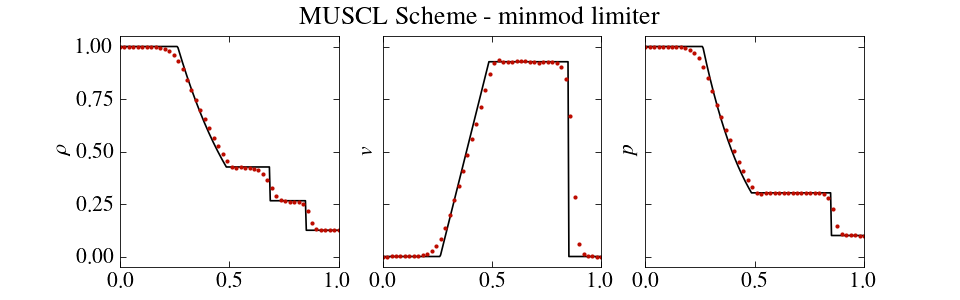

In [97]:
limiter = minmod
u_sod = advance_solution(u0, dt, tf)
plot_sod(u_sod, 'MUSCL Scheme - minmod limiter')

<IPython.core.display.Javascript object>


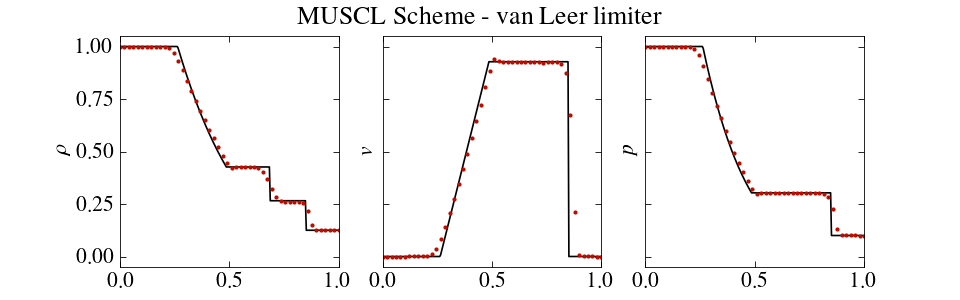

In [98]:
limiter = van_leer
u_sod = advance_solution(u0, dt, tf)
plot_sod(u_sod, 'MUSCL Scheme - van Leer limiter')

<IPython.core.display.Javascript object>


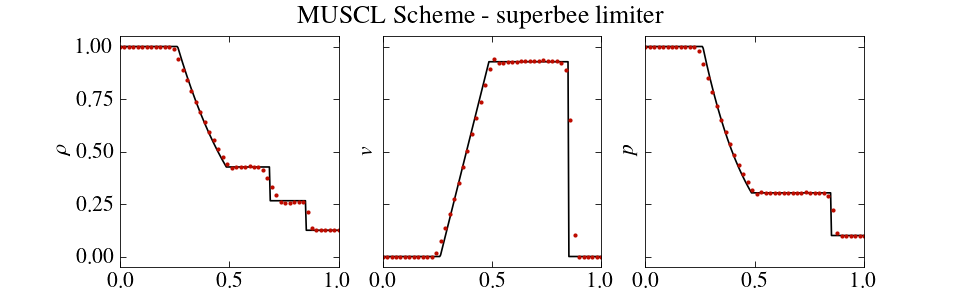

In [99]:
limiter = superbee
u_sod = advance_solution(u0, dt, tf)
plot_sod(u_sod, 'MUSCL Scheme - superbee limiter')

- Repeat the above steps using 100 cells and compare your results with the Godunov scheme. Are there any benefits of using the MUSCL approach?
- Which limiter would you recommend for the problem described here?